<a href="https://colab.research.google.com/github/irvandandung/surivor_titanic_project/blob/master/project_2_titanic_survivor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**- Download titanic.csv**

In [2]:
!wget -O /content/sample_data/titanic.csv https://raw.githubusercontent.com/irvandandung/surivor_titanic_project/master/titanic.csv

--2021-08-20 12:46:04--  https://raw.githubusercontent.com/irvandandung/surivor_titanic_project/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘/content/sample_data/titanic.csv’

/content/sample_dat 100%[===================>]  58.89K  --.-KB/s    in 0.003s  

2021-08-20 12:46:04 (16.5 MB/s) - ‘/content/sample_data/titanic.csv’ saved [60302/60302]



**- Import Package**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

**- Read file titanic.csv using pandas**

In [4]:
data = pd.read_csv('/content/sample_data/titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**- Data Exploration**

In [5]:
print(data.columns)
print(data.describe([.20, .40, .60, .80], 'all'))
print(data.shape)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
        PassengerId    Survived      Pclass  ...        Fare Cabin  Embarked
count    891.000000  891.000000  891.000000  ...  891.000000   204       889
unique          NaN         NaN         NaN  ...         NaN   147         3
top             NaN         NaN         NaN  ...         NaN    G6         S
freq            NaN         NaN         NaN  ...         NaN     4       644
mean     446.000000    0.383838    2.308642  ...   32.204208   NaN       NaN
std      257.353842    0.486592    0.836071  ...   49.693429   NaN       NaN
min        1.000000    0.000000    1.000000  ...    0.000000   NaN       NaN
20%      179.000000    0.000000    1.000000  ...    7.854200   NaN       NaN
40%      357.000000    0.000000    2.000000  ...   10.500000   NaN       NaN
50%      446.000000    0.000000    3.000000  ...   14.454200   NaN       NaN


In [6]:
# cek info tiap kolom untuk melihat baris mana yang kosong dan selanjutnya proses datanya
# age, cabin & embarked memiliki data yang kosong
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [7]:
#cek data survivor titanic
print('0 = tidak hidup')
print('1 = hidup')
print('===============')
data['Survived'].value_counts()

0 = tidak hidup
1 = hidup


0    549
1    342
Name: Survived, dtype: int64

**- Cleansing Data**

In [8]:
# hitung usia rata-rata berdasarkan kelas penumpang untuk mengisi sel usia yang kosong
print(data.groupby('Pclass').mean()[['Age']])

              Age
Pclass           
1       38.233441
2       29.877630
3       25.140620


In [9]:
# Isi nilai kosong pada column umur (Age)
data['Age'].fillna(data['Age'].median(), inplace=True)
# Isi data kosong di kolom embarked dan fare
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [10]:
# Cek row jika ada sel kosong yang tersisa di column usia (Age)
print(data.isnull().sum())
# Drop data Cabin, name, passenger ID & Ticket pada data ketiga data tersebut tidak relevan dengan terkait yang namanya kesempatan hidup, dan cabin sudah diwakilkan dengan tarif (Fare)
drop_columns = ['Cabin', 'PassengerId', 'Ticket', 'Name']
data = data.drop(drop_columns, axis=1)
data.head()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:
# Ubah data non numeric menjadi data numeric
data['Sex'] = data['Sex'].map({'female': 0, 'male': 1}).astype(int)
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


**- Analytic Data with Seaborn**

                Age
Survived           
0         30.028233
1         28.291433
               Fare
Survived           
0         22.117887
1         48.395408


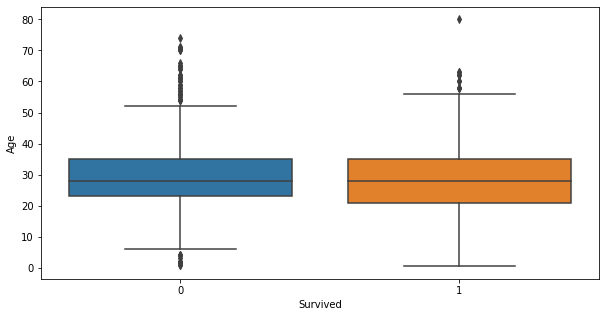

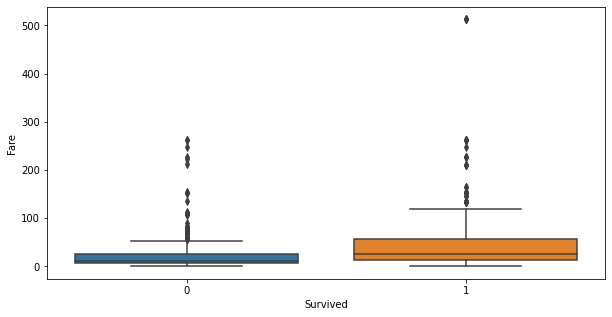

In [12]:
# Membuat scatter plot untuk mengecek keterikatan variabel sex, Pclass, fare & embarked dengan survived
plt.figure(figsize=(10, 5))
sns.boxplot(x='Survived', y='Age', data=data)

# Rata - rata umur orang yang bertahan / tidak
print(data.groupby('Survived').mean()[['Age']])

plt.figure(figsize=(10, 5))
sns.boxplot(x='Survived', y='Fare', data=data)

# Rata - rata umur orang yang bertahan / tidak
print(data.groupby('Survived').mean()[['Fare']])

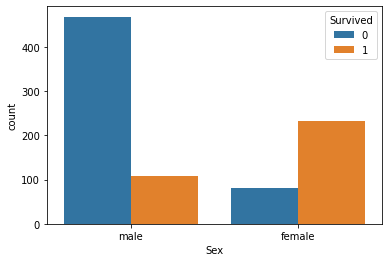

In [13]:
# Jumlah orang yang bertahan / tidak berdasarkan jenis kelamin
data['Sex'] = data['Sex'].map({0: 'female', 1: 'male'}).astype(str)
sns.countplot(x='Sex', data=data, hue='Survived')
data['Sex'] = data['Sex'].map({'female': 0, 'male': 1}).astype(int)

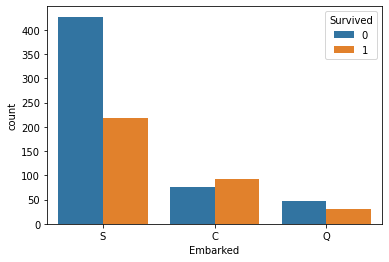

In [14]:
# Jumlah orang yang bertahan / tidak berdasarkan Embarked
data['Embarked'] = data['Embarked'].map({0: 'S', 1: 'C', 2: 'Q'}).astype(str)
sns.countplot(x='Embarked', data=data, hue='Survived')
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

**- Feature Set**

In [15]:
X = data.iloc[:, 1:].values
X = preprocessing.StandardScaler().fit_transform(X)
X[0:5]

array([[ 0.82737724,  0.73769513, -0.56573646,  0.43279337, -0.47367361,
        -0.50244517, -0.56883712],
       [-1.56610693, -1.35557354,  0.66386103,  0.43279337, -0.47367361,
         0.78684529,  1.00518113],
       [ 0.82737724, -1.35557354, -0.25833709, -0.4745452 , -0.47367361,
        -0.48885426, -0.56883712],
       [-1.56610693, -1.35557354,  0.4333115 ,  0.43279337, -0.47367361,
         0.42073024, -0.56883712],
       [ 0.82737724,  0.73769513,  0.4333115 , -0.4745452 , -0.47367361,
        -0.48633742, -0.56883712]])

In [16]:
y = data.iloc[:, 0].values
y[0:5]

array([0, 1, 1, 1, 0])

**- Train Test Split**

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (712, 7) (712,)
Test set: (179, 7) (179,)


**- Classification With KNN**

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
k = 5
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [20]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 0, 1, 1, 0])

In [21]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8553370786516854
Test set Accuracy:  0.8435754189944135


In [22]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.78212291, 0.81564246, 0.82122905, 0.82122905, 0.84357542,
       0.84357542, 0.84357542, 0.83798883, 0.83798883])

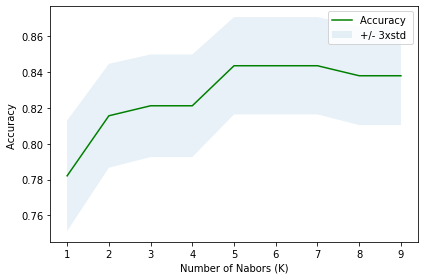

In [23]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [24]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.8435754189944135 with k= 5


**- Test Predict Data**

In [47]:
!wget -O /content/sample_data/DataUjiTitanic.csv https://raw.githubusercontent.com/irvandandung/surivor_titanic_project/master/DataUjiTitanic.csv

--2021-08-20 12:51:27--  https://raw.githubusercontent.com/irvandandung/surivor_titanic_project/master/DataUjiTitanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 591 [text/plain]
Saving to: ‘/content/sample_data/DataUjiTitanic.csv’

/content/sample_dat 100%[===================>]     591  --.-KB/s    in 0s      

2021-08-20 12:51:27 (58.8 MB/s) - ‘/content/sample_data/DataUjiTitanic.csv’ saved [591/591]



In [48]:
dataUji = pd.read_csv('/content/sample_data/DataUjiTitanic.csv')
dataUji.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
1,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
2,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
3,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C
4,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7000,G6,S
5,12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.5500,C103,S
6,13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,NaN,S


In [49]:
# Drop data Cabin, name, passenger ID & Ticket pada data ketiga data tersebut tidak relevan dengan terkait yang namanya kesempatan hidup, dan cabin sudah diwakilkan dengan tarif (Fare)
drop_columns = ['Cabin', 'PassengerId', 'Ticket', 'Name']
dataUji = dataUji.drop(drop_columns, axis=1)
dataUji.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,male,54,0,0,51.8625,S
1,0,3,male,2,3,1,21.0750,S
2,1,3,female,27,0,2,11.1333,S
3,1,2,female,14,1,0,30.0708,C
4,1,3,female,4,1,1,16.7000,S


In [50]:
# Ubah data non numeric menjadi data numeric
dataUji['Sex'] = dataUji['Sex'].map({'female': 0, 'male': 1}).astype(int)
dataUji['Embarked'] = dataUji['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
dataUji.head(7)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,1,54,0,0,51.8625,0
1,0,3,1,2,3,1,21.0750,0
2,1,3,0,27,0,2,11.1333,0
3,1,2,0,14,1,0,30.0708,1
4,1,3,0,4,1,1,16.7000,0
5,1,1,0,58,0,0,26.5500,0
6,0,3,1,20,0,0,8.0500,0


In [51]:
x_new = dataUji.iloc[:, 1:].values
x_new = preprocessing.StandardScaler().fit_transform(X)
x_new[0:5]

array([[ 0.82737724,  0.73769513, -0.56573646,  0.43279337, -0.47367361,
        -0.50244517, -0.56883712],
       [-1.56610693, -1.35557354,  0.66386103,  0.43279337, -0.47367361,
         0.78684529,  1.00518113],
       [ 0.82737724, -1.35557354, -0.25833709, -0.4745452 , -0.47367361,
        -0.48885426, -0.56883712],
       [-1.56610693, -1.35557354,  0.4333115 ,  0.43279337, -0.47367361,
         0.42073024, -0.56883712],
       [ 0.82737724,  0.73769513,  0.4333115 , -0.4745452 , -0.47367361,
        -0.48633742, -0.56883712]])

In [56]:
neigh = KNeighborsClassifier(n_neighbors = 4).fit(X_train,y_train)
y_predict = neigh.predict(x_new)
print('x_new index-0 adalah not survived(0):', y_predict[0] == 0)
print('x_new index-1 adalah not survived(0):', y_predict[1] == 0)
print('x_new index-2 adalah survived(1):', y_predict[2] == 1)
print('x_new index-3 adalah survived(1):', y_predict[3] == 1)
print('x_new index-4 adalah survived(1):', y_predict[5] == 1)
print('x_new index-5 adalah survived(1):', y_predict[6] == 0)
print('x_new index-6 adalah survived(1):', y_predict[7] == 0)

x_new index-0 adalah not survived(0): True
x_new index-1 adalah not survived(0): False
x_new index-2 adalah survived(1): True
x_new index-3 adalah survived(1): True
x_new index-4 adalah survived(1): False
x_new index-5 adalah survived(1): True
x_new index-6 adalah survived(1): True
